In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import utils
import pandas as pd
import time
from IPython import display

import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Read the data

In [2]:
data = pd.read_csv('data/birth_life_2010.txt', sep='\t')

In [3]:
data

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659
...,...,...,...
185,Burundi,4.338,49.877220
186,Burkina Faso,5.850,54.924195
187,Botswana,2.750,53.109512
188,Benin,5.287,55.585585


In [4]:
data.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [5]:
data.describe()

,Birth rate,Life expectancy
count,190.000000,190.000000
mean,2.814573,69.617474
std,1.419560,9.813890
min,1.092000,47.365073
25%,1.749750,64.712451
50%,2.311000,73.004707
75%,3.675250,76.287848
max,7.063000,82.932683


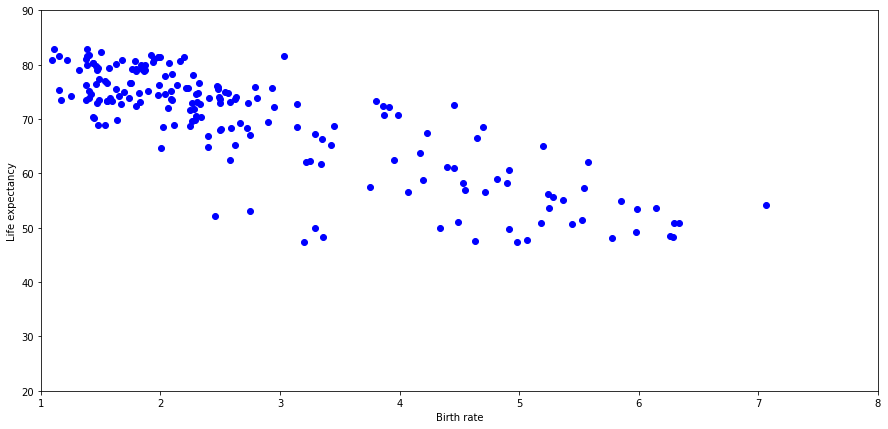

In [6]:
data, n_samples = utils.read_birth_life_data('data/birth_life_2010.txt')
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlim([1,8])
ax.set_ylim([20,90])
ax.set_xlabel('Birth rate')
ax.set_ylabel('Life expectancy')
ax.plot(data[:,0], data[:,1], 'bo', label='Real data')

### Creamos los placeholders

In [7]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

### Definimos los pesos y el bias inicializados a 0

In [8]:
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

### Costruimos el modelo

In [9]:
Y_predicted = w * X + b 

### Funcion de perdida como el error cuadratico

In [10]:
loss = tf.square(Y - Y_predicted, name='loss')

### Descenso por gradiente

In [11]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

### Train loop

In [12]:
writer = tf.summary.FileWriter('./tutorial_2', tf.get_default_graph())
with tf.Session() as sess:
    # Inicializamos las variables: w and b
    sess.run(tf.global_variables_initializer()) 
    # Entrenamos el modelo 100 epochs
    for i in range(100): 
        total_loss = 0
        for x, y in data:
            # Ejecutamos el optimizador rellenando los placeholders
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        w_out, b_out = sess.run([w, b]) 
    # for tensorboard
    writer.close()     

Epoch 0: 490.15910439699593
Epoch 1: 263.7506495726148
Epoch 2: 159.3668263046365
Epoch 3: 101.52515189706618
Epoch 4: 69.41203513054275
Epoch 5: 51.53756947319244
Epoch 6: 41.554978463762
Epoch 7: 35.955185015482435
Epoch 8: 32.795872784100204
Epoch 9: 31.000304762651457
Epoch 10: 29.970263171720465
Epoch 11: 29.3725205919497
Epoch 12: 29.020745035464948
Epoch 13: 28.810279397442507
Epoch 14: 28.68194799397116
Epoch 15: 28.602074145584513
Epoch 16: 28.551256058196305
Epoch 17: 28.518195809317923
Epoch 18: 28.49622749929886
Epoch 19: 28.48135876765775
Epoch 20: 28.47108433970379
Epoch 21: 28.463892261157007
Epoch 22: 28.458790166528992
Epoch 23: 28.455121075511467
Epoch 24: 28.452487780626765
Epoch 25: 28.450570022248613
Epoch 26: 28.4491650285138
Epoch 27: 28.448128492816497
Epoch 28: 28.447379740185447
Epoch 29: 28.446813733601257
Epoch 30: 28.44642034321043
Epoch 31: 28.446100941920456
Epoch 32: 28.445876882288996
Epoch 33: 28.44571358670211
Epoch 34: 28.445581011104053
Epoch 35: 28

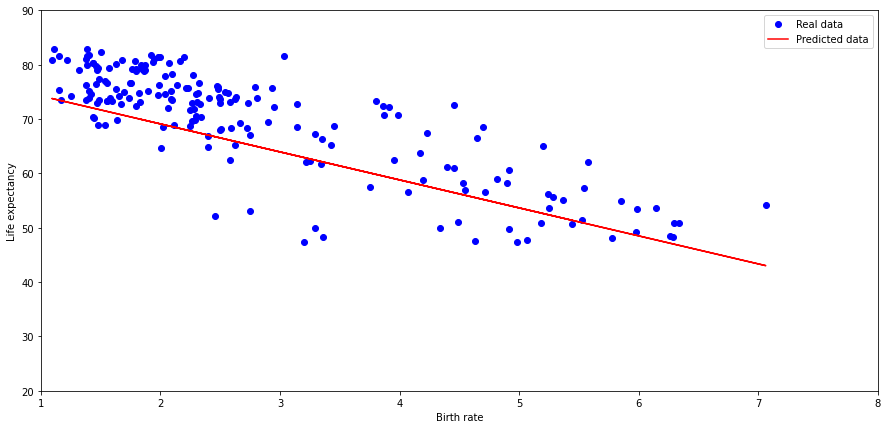

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlim([1,8])
ax.set_ylim([20,90])
ax.set_xlabel('Birth rate')
ax.set_ylabel('Life expectancy')
ax.plot(data[:,0], data[:,1], 'bo', label='Real data')
ax.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
ax.legend()

### Entrenamiento interactivo

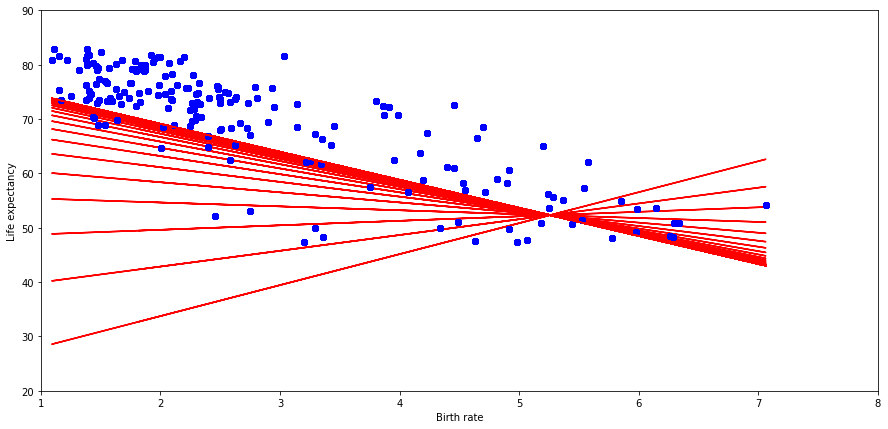

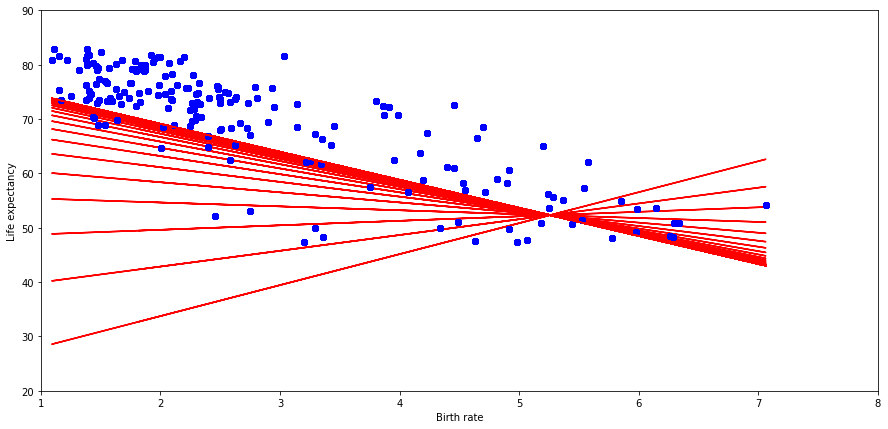

In [14]:
def plot_graph(fig, ax, w, b, data):
    ax.plot(data[:,0], data[:,1], 'bo', label='Real data')
    ax.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
    
# plot the results
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlim([1,8])
ax.set_ylim([20,90])
ax.set_xlabel('Birth rate')
ax.set_ylabel('Life expectancy')
    
start = time.time()
writer = tf.summary.FileWriter('./graphs/linear_reg', tf.get_default_graph())
with tf.Session() as sess:
    # Inicializamos las variables: w and b
    sess.run(tf.global_variables_initializer()) 
    # Entrenamos el modelo 100 epochs
    for i in range(100): 
        total_loss = 0
        for x, y in data:
            # Ejecutamos el optimizador rellenando los placeholders
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        #print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        w_out, b_out = sess.run([w, b]) 
         
        plot_graph(fig, ax, w_out, b_out, data)
        display.clear_output(wait=True)
        display.display(plt.gcf())
    # for tensorboard
    writer.close()     